# 🔎 Análisis Exploratorio de Datos (Google):

## Importación de librerias

In [1]:
from textblob import TextBlob
import datetime
import inspect
import re
import matplotlib.pyplot as plt
import inspect
import pandas as pd
import gzip
import os
import seaborn as sns
import numpy as np
from data_utils import data_type_check

### Importación de los datasets

In [2]:
df_metadata = pd.read_parquet('../0_Dataset/Data_Limpia/Google/G_metadata_FL.parquet', engine='pyarrow')
df_review = pd.read_parquet('../0_Dataset/Data_Limpia/Google/G_review_FL_reducido.parquet', engine='pyarrow')

## Metadata de Florida (FL)

Verificación de los datos

In [12]:
df_metadata.head(5)

,name,address,latitude,longitude,category,avg_rating,num_of_reviews
0,Neurocare & Family Services,"Neurocare & Family Services, 1749 S Naperville...",41.839291,-88.100503,[Doctor],5.0,1
1,Bayview Canvas,"Bayview Canvas, 22460 Glass Ln, Port Charlotte...",26.962494,-82.075552,[Upholstery shop],5.0,1
2,Peluquería Acapulco Barbershop,"Peluquería Acapulco Barbershop, 1014 Gault Ave...",34.450636,-85.714130,[Barber shop],4.8,58
3,Mountain Travelers Hike and Ski Shop,"Mountain Travelers Hike and Ski Shop, 147 US-4...",43.622089,-72.953674,"[Ski shop, Camping store, Car accessories store]",4.4,26
4,Lovely Nails,"Lovely Nails, 636 Brandon Ave SW, Roanoke, VA ...",37.254535,-79.959470,[Nail salon],4.3,145


### 1. Información y transformación de los datos

In [ ]:
# SE REALIZARÁ UN REINICIO DE INDICES
df_metadata.reset_index(drop=True,inplace=True)

In [8]:
# OBTENEMOS SOLO LAS COLUMNAS QUE NOS VAN A AYUDAR A NUESTRO ANÁLISIS
df_metadata.drop(columns=['gmap_id','relative_results','url'],inplace=True)

In [22]:
# OBTENEMOS UN ANÁLISIS DE DATOS EN CUANTOS A LA CANTIDAD DE NULOS OBTENIDOS
data_type_check(df_metadata)


 Resumen del dataframe:

Dimensiones:  (212299, 7)
          columna  %_no_nulos  %_nulos  total_nulos tipo_dato
0            name       100.0      0.0            0    object
1         address       100.0      0.0            0    object
2        latitude       100.0      0.0            0   float64
3       longitude       100.0      0.0            0   float64
4        category       100.0      0.0            0    object
5      avg_rating       100.0      0.0            0   float64
6  num_of_reviews       100.0      0.0            0     int64


#### 📚 Conclusión:
- Se ve que al realizar un análisis de cantidad de datos nulos, tenemos una gran cantidad de estos en las distintos registros y en las distintas variables del dataset.
- Nuestra norma en cuanto a la eliminación de nulos será si es mayor o igual al 18% se eliminarán, estas columnas serían: ['description', 'price', 'hours', 'MISC', 'state']
- Luego de eliminar las columnas procedemos a eliminar los registros que contienen registros nulos.

In [11]:
# ELIMINACIÓN DE COLUMNAS CON MAYOR CANTIDAD DE NULOS
df_metadata.drop(columns=['description', 'price', 'hours', 'MISC', 'state'] ,inplace=True)

In [20]:
# ELIMINACIÓN DE REGISTRO QUE CONTINENEN REGISTRO NULOS
df_metadata.dropna(axis=0,inplace=True)

### 2.Variables categóricas y cuantitativas

In [21]:
# VARIABLE CATEGÓRICAS Y CUANTITATIVAS EXISTENTES EN EL DATASET
df_metadata_cat = df_metadata.select_dtypes('O')
df_metadata_num = df_metadata.select_dtypes('number')

#### Variables cuantitativas

In [25]:
# MUESTRA DEL DATASET
df_metadata_num.head(5)

,latitude,longitude,avg_rating,num_of_reviews
0,41.839291,-88.100503,5.0,1
1,26.962494,-82.075552,5.0,1
2,34.450636,-85.714130,4.8,58
3,43.622089,-72.953674,4.4,26
4,37.254535,-79.959470,4.3,145


In [32]:
# DESCRIPCIÓN ESTADISTICO DE LOS DATOS NUMÉRICOS
df_metadata_num.loc[:,['avg_rating','num_of_reviews']].describe().T

,count,mean,std,min,25%,50%,75%,max
avg_rating,212299.0,4.298270,0.729039,1.0,4.0,4.5,4.8,5.0
num_of_reviews,212299.0,33.826127,72.807075,1.0,6.0,15.0,37.0,6960.0


'Se aprecia que la mayoría de los restaurantes tienen calificación de 4.0 a 5.0.\nEn su mayoría estos restaurantes están calificados positivamente'

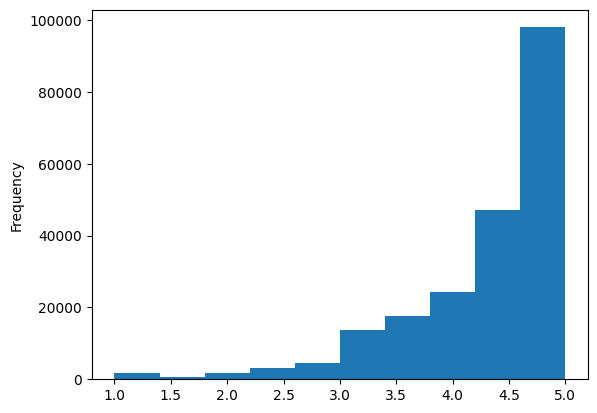

In [30]:
# HISTOGRAMA DE LA CANTIDAD DE CALIFICACIÓN QUE SE DA LOS RESTAURANTES
df_metadata_num.avg_rating.plot.hist()

"""Se aprecia que la mayoría de los restaurantes tienen calificación de 4.0 a 5.0.
En su mayoría estos restaurantes están calificados positivamente"""

In [33]:
df_metadata_num.avg_rating.value_counts()

avg_rating
5.0    38728
4.8    16146
4.7    15037
4.9    14179
4.5    14018
4.6    13907
4.4    11932
4.3    11883
4.0    11182
4.2     9307
4.1     7745
3.9     5442
3.7     5297
3.8     5231
3.0     4686
3.5     3578
3.6     3372
3.3     2890
3.4     2826
3.2     1887
3.1     1552
1.0     1455
2.8     1311
2.9     1162
2.7     1079
2.5      984
2.3      978
2.6      918
2.0      907
2.4      650
2.2      406
2.1      324
1.8      303
1.9      223
1.7      196
1.5      185
1.6      147
1.3       98
1.4       88
1.2       39
1.1       21
Name: count, dtype: int64

#### Variables categóricas

In [29]:
df_metadata_cat.name.value_counts()

name
Subway                          552
United States Postal Service    524
Shell                           472
U-Haul Neighborhood Dealer      392
Redbox                          370
                               ... 
Dennis Meighan, DO                1
Dodge Avenue K9's & Training      1
Us Donuts                         1
Monteith Branch                   1
Mr Falafel Plus                   1
Name: count, Length: 183109, dtype: int64